# Natural Language Processing Explore

1. Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [2]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import acquire
import prepare

from env import get_db_url

In [3]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"
df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['text_cleaned_lem'] = df.text.apply(prepare.lemmatize)

In [7]:
df.to_csv('lessons/spam.csv', index=False)

In [3]:
# combine all messages in single string by label

ham_words = prepare.lemmatize(prepare.basic_clean(' '.join(df[df.label == 'ham'].text))).split()
spam_words = prepare.lemmatize(prepare.basic_clean(' '.join(df[df.label == 'spam'].text))).split()
all_words = prepare.lemmatize(prepare.basic_clean(' '.join(df.text))).split()

In [4]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()



In [5]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


,all,ham,spam
',6,6,0
'',15,15,0
''ok'',5,5,0
'an,1,1,0
'anything',1,1,0


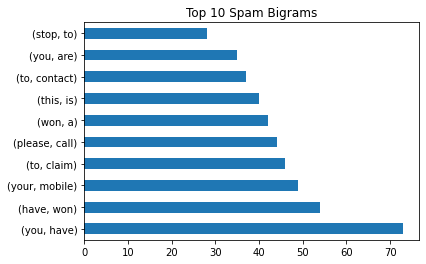

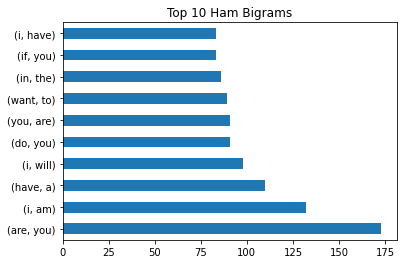

In [6]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(10).plot.barh()
plt.title("Top 10 Spam Bigrams")
plt.show()
pd.Series(nltk.bigrams(ham_words)).value_counts().head(10).plot.barh()
plt.title("Top 10 Ham Bigrams")
plt.show()

Text(0.5, 1.0, 'Ham')

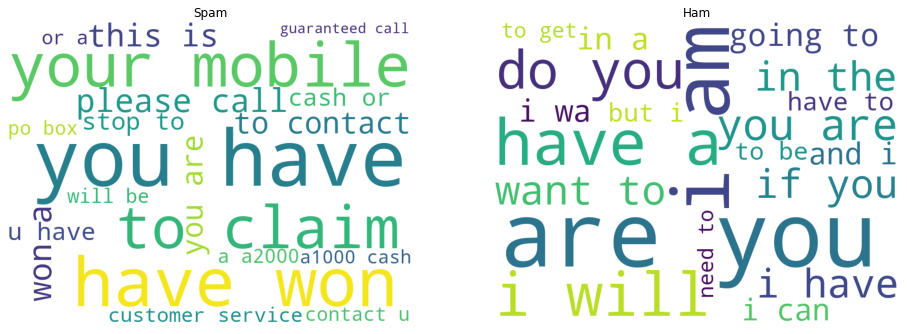

In [7]:
fig, ax = plt.subplots(1,2,figsize = (16,8))
for i, word_set in enumerate([spam_words, ham_words]):
    bigrams = {k[0] + ' ' + k[1]: v for k,v in pd.Series(nltk.bigrams(word_set)).value_counts().head(20).to_dict().items()}
    img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(bigrams)
    ax[i].imshow(img)
    ax[i].axis('off')
ax[0].set_title("Spam")
ax[1].set_title("Ham")

Bigrams don't have much overlap between ham and spam. Could be a good way to distinguish between the two.

In [8]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words)).value_counts()
ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts()
bigram_df = pd.DataFrame()
bigram_df['spam'] = spam_bigrams
bigram_df['ham'] = ham_bigrams
# bigram_df['spam_rank'] = pd.Series(nltk.bigrams(spam_words.split())).value_counts().rank(ascending=False)
# bigram_df['ham_rank'] = pd.Series(nltk.bigrams(ham_words.split())).value_counts().rank(ascending=False)

In [9]:
set(spam_bigrams.head(20).index).intersection(set(ham_bigrams.head(20).index))

{('you', 'are')}

Only overlap is with:
- you, are

## Trigrams  - spam/ham

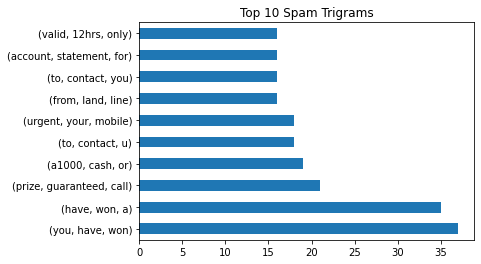

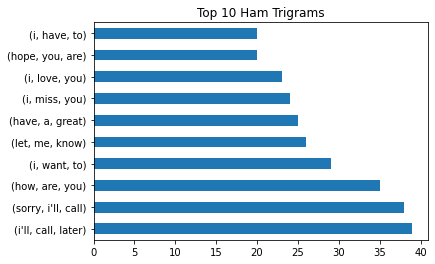

In [10]:
pd.Series(nltk.ngrams(spam_words,3)).value_counts().head(10).plot.barh()
plt.title("Top 10 Spam Trigrams")
plt.show()
pd.Series(nltk.ngrams(ham_words,3)).value_counts().head(10).plot.barh()
plt.title("Top 10 Ham Trigrams")
plt.show()

Text(0.5, 1.0, 'All')

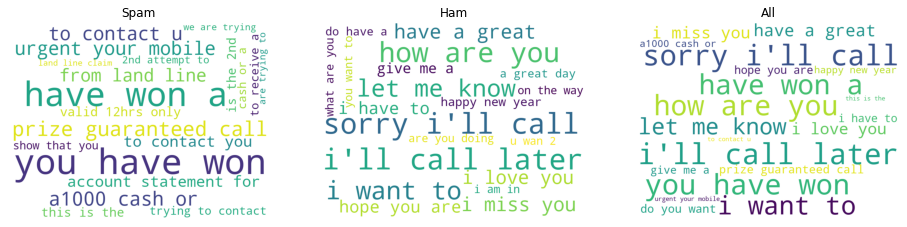

In [11]:
fig, ax = plt.subplots(1,3,figsize = (16,8))
for i, word_set in enumerate([spam_words, ham_words, all_words]):
    trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k,v in pd.Series(nltk.ngrams(word_set,3)).value_counts().head(20).to_dict().items()}
    img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(trigrams)
    ax[i].imshow(img)
    ax[i].axis('off')
ax[0].set_title("Spam")
ax[1].set_title("Ham")
ax[2].set_title("All")

Trigrams don't have much overlap between ham and spam.

In [12]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words,3)).value_counts()
ham_trigrams = pd.Series(nltk.ngrams(ham_words,3)).value_counts()

trigram_df = pd.DataFrame()
trigram_df['spam'] = spam_trigrams
trigram_df['ham'] = ham_trigrams


In [13]:
trigram_df.fillna(0).sort_values(by=['spam','ham'],ascending=False).head(20)

,spam,ham
"(you, have, won)",37,0.0
"(have, won, a)",35,0.0
"(prize, guaranteed, call)",21,0.0
"(a1000, cash, or)",19,0.0
"(to, contact, u)",18,0.0
"(urgent, your, mobile)",18,0.0
"(to, contact, you)",16,1.0
"(from, land, line)",16,0.0
"(account, statement, for)",16,0.0
"(valid, 12hrs, only)",16,0.0


In [14]:
set(spam_trigrams.head(20).index).intersection(set(ham_trigrams.head(20).index))

set()

No overlap between top 20 trigrams

In [15]:
set(spam_trigrams.head(100).index).intersection(set(ham_trigrams.head(100).index))

{('do', 'you', 'want')}

At top 100 trigrams we get 1 overlap

# Blog posts exploration

In [16]:
df = prepare.create_prepared_blog_df()

In [17]:
df.date_published = pd.to_datetime(df.date_published)

Breaking up posts into older and newer (2022 vs earlier) for comparison

In [18]:
older = df[df.date_published<'2022']
newer = df[df.date_published>='2022']

In [19]:
all_articles = ' '.join(df.lemmatized)
new_articles = ' '.join(newer.lemmatized)
old_articles = ' '.join(older.lemmatized)

In [20]:
all_words = all_articles.split()
new_words = new_articles.split()
old_words = old_articles.split()


In [21]:
new_freq = pd.Series(new_words).value_counts()
old_freq = pd.Series(old_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [22]:
all_freq.head()

program    64
tech       47
cloud      46
hired      44
career     38
dtype: int64

In [23]:
word_counts = (pd.concat([all_freq, old_freq, new_freq], axis=1, sort=True)
                .set_axis(['all', 'old', 'new'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [24]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,old,new
program,64,38,26
tech,47,19,28
cloud,46,13,33
hired,44,44,0
career,38,20,18
codeup,36,24,12
job,31,23,8
like,31,19,12
student,28,24,4
system,27,26,1


Any words that uniquely identify old vs new posts?

In [25]:
pd.concat([word_counts[word_counts.new == 0].sort_values(by='old').tail(6),
           word_counts[word_counts.old == 0].sort_values(by='new').tail(6)])


,all,old,new
cgi,10,10,0
federal,13,13,0
accenture,14,14,0
java,15,15,0
associate,20,20,0
hired,44,44,0
workshop,8,0,8
castle,10,0,10
book,10,0,10
tec,15,0,15


There are some words that only appear in old vs new

Text(0.5, 1.0, 'Proportion of New vs Old for the 20 most common words')

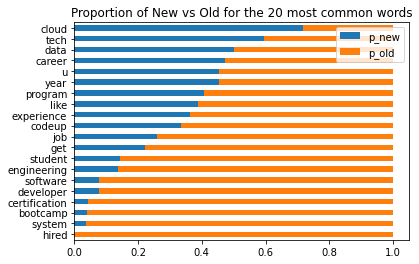

In [26]:
# figure out the percentage of old vs new
(word_counts
 .assign(p_new=word_counts.new / word_counts['all'],
         p_old=word_counts.old / word_counts['all'])
 .sort_values(by='all')
 [['p_new', 'p_old']]
 .tail(20)
 .sort_values('p_new')
 .plot.barh(stacked=True))

plt.title('Proportion of New vs Old for the 20 most common words')


Text(0.5, 1.0, 'New Articles')

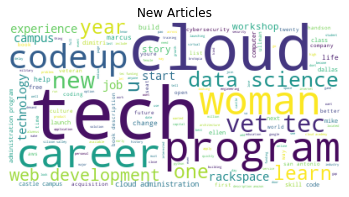

In [27]:
img = WordCloud(background_color='white').generate(new_articles)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('New Articles')

Text(0.5, 1.0, 'Old Articles')

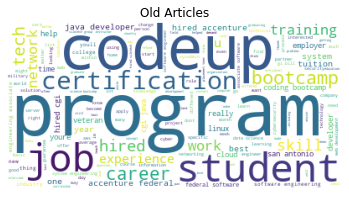

In [28]:
img = WordCloud(background_color='white').generate(old_articles)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('Old Articles')

Codeup and program still feature prominently. Seems like cloud is getting more traction in new articles and there's been less emphasis on hiring, certification, and job lately.

In [29]:
old_bigrams = nltk.ngrams(old_words, 2)
new_bigrams = nltk.ngrams(new_words, 2)

In [30]:
top_20_old_bigrams = (pd.Series(nltk.ngrams(old_words, 2))
                      .value_counts()
                      .head(20))
top_20_new_bigrams = (pd.Series(nltk.ngrams(new_words, 2))
                      .value_counts()
                      .head(20))


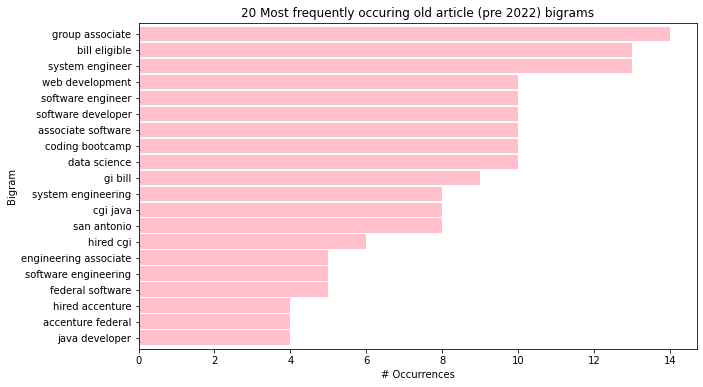

In [31]:
top_20_old_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring old article (pre 2022) bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_old_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


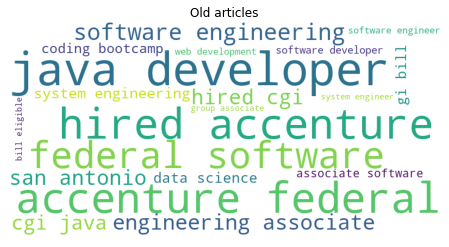

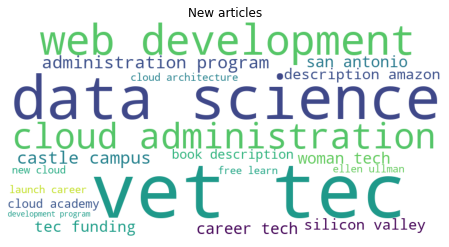

In [32]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_old_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Old articles')
plt.show()
data = {k[0] + ' ' + k[1]: v for k, v in top_20_new_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('New articles')
plt.show()



Data science more talked about lately! Hiring not so much...

# News exploration

In [33]:
# Added ', monday, and 'said' to stopwords as these are very frequently occuring but don't provide much context
df = prepare.create_prepared_news_df(extra_words=["'","said","monday"])

Importing from csv


In [34]:
df.head()

,title,author,datetime,category,original,clean,stemmed,lemmatized
0,"Delhi sees less than 1,000 new COVID-19 cases,...",Deepika Bhatt,2022-05-09T17:40:11.000Z,national,Delhi on Monday reported 799 new cases of COVI...,delhi reported 799 new cases covid19 three dea...,delhi report 799 new case covid19 three death ...,delhi reported 799 new case covid19 three deat...
1,Parts of Mumbai face power outages due to tech...,Shreyasi Banerjee,2022-05-09T17:30:34.000Z,national,Power outages were reported in parts of Mumbai...,power outages reported parts mumbai including ...,power outag report part mumbai includ bandra k...,power outage reported part mumbai including ba...
2,CBI books former staff member of TMC MLA Babul...,Shreyasi Banerjee,2022-05-09T15:45:34.000Z,national,The Central Bureau of Investigation (CBI) has ...,central bureau investigation cbi booked former...,central bureau investig cbi book former staff ...,central bureau investigation cbi booked former...
3,"2, including toddler, burnt alive as car catch...",Shreyasi Banerjee,2022-05-09T16:26:54.000Z,national,"Two people, including a toddler, were charred ...",two people including toddler charred death two...,two peopl includ toddler char death two famili...,two people including toddler charred death two...
4,11 fishermen stranded in Odisha sea airlifted ...,Shreyasi Banerjee,2022-05-09T16:57:17.000Z,national,"Eleven fishermen, who were stranded in the Son...",eleven fishermen stranded sonepur sea odisha g...,eleven fishermen strand sonepur sea odisha gan...,eleven fisherman stranded sonepur sea odisha g...


In [35]:
def generate_category_words(df, categorical = 'category'):
    """ Joins all words in each news article per category. Outputs dataframe with all_words by category."""
    
    category_words = {}
    
    # Get all words for lemmatized version of all articles in category
    for category in df[categorical].unique():
        sample = df[df[categorical] == category]
        cat_words = ' '.join(sample.lemmatized)
        
        category_words[category] = cat_words
        
    category_words['all'] = ' '.join(df.lemmatized)
        
    return pd.DataFrame(category_words, index = ['all_words']).T

In [36]:
all_words_df=generate_category_words(df)

In [37]:
def generate_word_count_df(all_words_df):
    
    
    all_words_df = pd.concat([all_words_df, all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())],axis=1)
    
    # Transpose and fill NaN with 0
    all_words_df = all_words_df.T.fillna(0)
    
    # Drop the all_words row
    all_words_df = all_words_df.drop(all_words_df.index[0])
        
    return all_words_df

In [38]:
# all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())

In [39]:
word_counts = generate_word_count_df(all_words_df)
# word_counts = word_counts.fillna(0).drop(word_counts.index[0])

In [40]:
word_counts

,national,business,sports,world,politics,technology,startup,entertainment,miscellaneous,hatke,science,automobile,all
police,13.0,0,0,4.0,7.0,0,0,1.0,7.0,4.0,0,1.0,37.0
case,8.0,1.0,0,0,1.0,2.0,1.0,2.0,1.0,0,0,1.0,17.0
official,7.0,0,0,2.0,0,0,0,0,2.0,0,0,0,11.0
reported,6.0,3.0,0,2.0,0,5.0,6.0,0,0,2.0,2.0,6.0,32.0
lakh,6.0,2.0,0,0,3.0,0,2.0,0,1.0,2.0,0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fastmoving,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0
brake,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0
putting,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0
chip,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0


What are the most frequently occuring words?

In [41]:
word_counts.sort_values(by='all', ascending=False).head(10)

,national,business,sports,world,politics,technology,startup,entertainment,miscellaneous,hatke,science,automobile,all
added,4.0,5.0,7.0,6.0,5.0,6.0,7.0,15.0,0,1.0,1.0,5.0,62.0
musk,0,9.0,0,2.0,0,26.0,13.0,0,0,0,0,0,50.0
world,0,3.0,7.0,4.0,0,11.0,6.0,1.0,2.0,10.0,1.0,1.0,46.0
time,4.0,11.0,0,2.0,2.0,1.0,3.0,9.0,1.0,5.0,5.0,1.0,44.0
india,2.0,1.0,6.0,3.0,3.0,5.0,12.0,2.0,1.0,0,0,7.0,42.0
people,1.0,1.0,0,4.0,3.0,4.0,3.0,9.0,6.0,4.0,4.0,2.0,41.0
company,2.0,5.0,0,0,2.0,3.0,7.0,0,0,8.0,2.0,11.0,40.0
year,2.0,3.0,2.0,7.0,1.0,1.0,5.0,4.0,3.0,2.0,4.0,6.0,40.0
police,13.0,0,0,4.0,7.0,0,0,1.0,7.0,4.0,0,1.0,37.0
may,1.0,8.0,1.0,4.0,5.0,4.0,4.0,4.0,1.0,0,3.0,2.0,37.0


Any words that unique identify a category?

In [42]:
unique_words = pd.DataFrame()
# Every category except all
for col in word_counts.columns[word_counts.columns != 'all']:
    # concatentate top 5 unique words for each category. 
    # Unique words determined by checking if the word count of the word is equal to the 'all' column value for that row
    unique_words = pd.concat([unique_words,
                              word_counts[word_counts.apply(lambda row: row[col] == row['all'], axis = 1)].sort_values(by=col).tail(5)])

In [43]:
# Display top 20
unique_words.head(5*4)

,national,business,sports,world,politics,technology,startup,entertainment,miscellaneous,hatke,science,automobile,all
technical,2.0,0,0,0,0,0,0,0,0,0,0,0,2.0
moderate,2.0,0,0,0,0,0,0,0,0,0,0,0,2.0
rain,3.0,0,0,0,0,0,0,0,0,0,0,0,3.0
seized,3.0,0,0,0,0,0,0,0,0,0,0,0,3.0
dowry,4.0,0,0,0,0,0,0,0,0,0,0,0,4.0
asset,0,4.0,0,0,0,0,0,0,0,0,0,0,4.0
tyre,0,4.0,0,0,0,0,0,0,0,0,0,0,4.0
subscribed,0,5.0,0,0,0,0,0,0,0,0,0,0,5.0
lic,0,6.0,0,0,0,0,0,0,0,0,0,0,6.0
ipo,0,9.0,0,0,0,0,0,0,0,0,0,0,9.0


Wordclouds

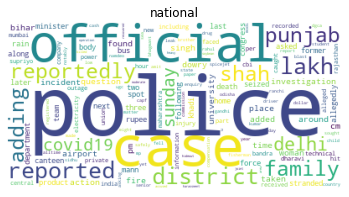

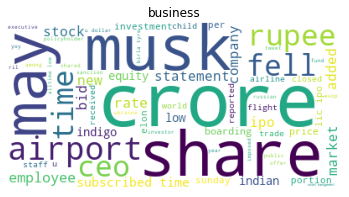

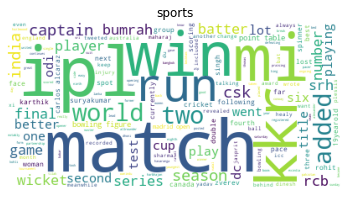

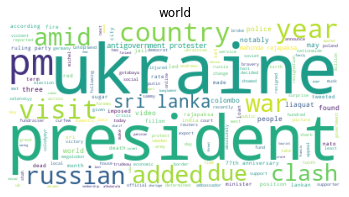

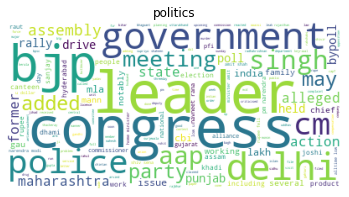

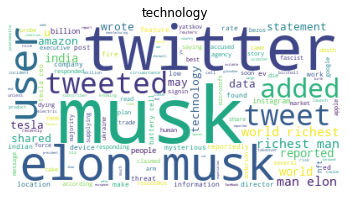

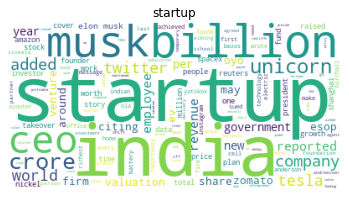

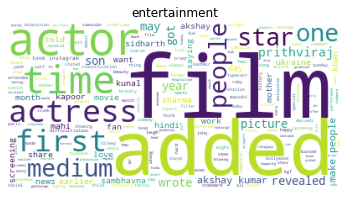

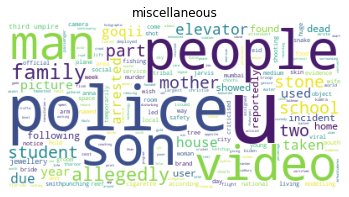

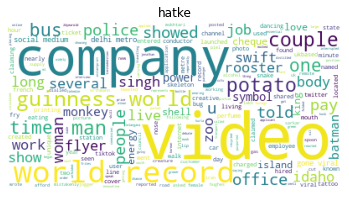

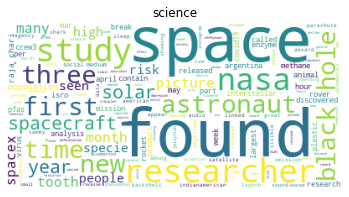

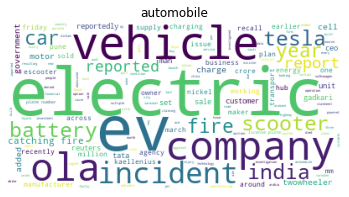

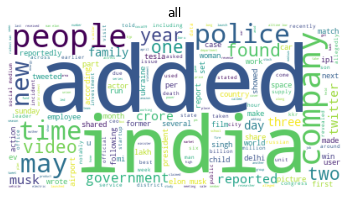

In [44]:

for col in word_counts.columns:
    img = WordCloud(background_color='white').generate(all_words_df.T[col]['all_words'])
    plt.imshow(img)
    # axis aren't very useful for a word cloud
    plt.axis('off')
    plt.title(col)
    plt.show()

#### Possible to see some unique values using the word cloud and get the emphasis. Lots of mention of Elon Mush for tech, startup, and business. Seems like the police factor heavily into national news.

## Bigram exploration - news

In [45]:
def plot_bigrams(df, category):
    """ Accepts all words dataframe and outputs plots of top 20 bigrams and wordcloud """
    # Generate bigrams
    bigrams = list(nltk.ngrams(all_words_df.T[category]['all_words'].split(),2))
    # Take top 20
    top_20_cat_bigrams = pd.Series(bigrams).value_counts().head(20)
    
    # Plot bar chart
    top_20_cat_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))
    
    # Ensure only integer values for x axis
    plt.xticks(range(top_20_cat_bigrams.sort_values().max()+1))

    plt.title(f'20 Most frequently occuring {category} bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurrences')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_cat_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    plt.show()
    
    # Plot wordcloud
    data = {k[0] + ' ' + k[1]: v for k, v in top_20_cat_bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(category)
    plt.show()

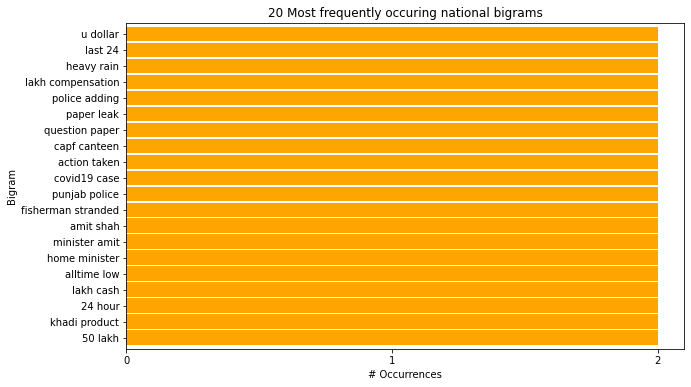

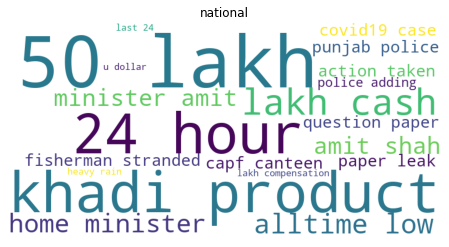

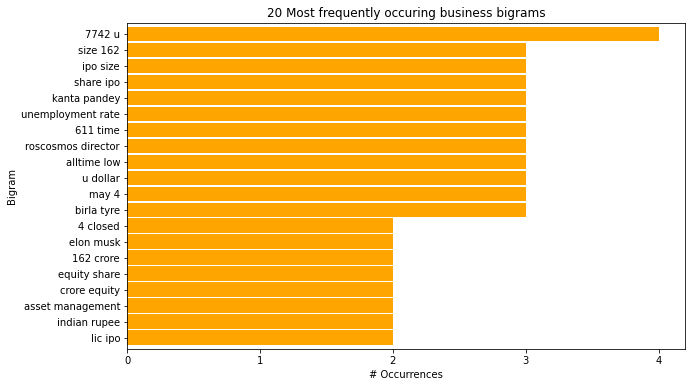

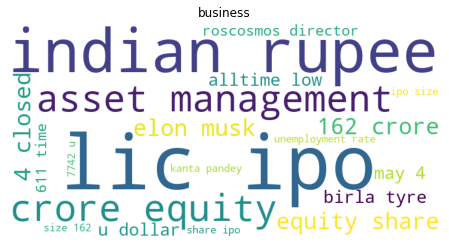

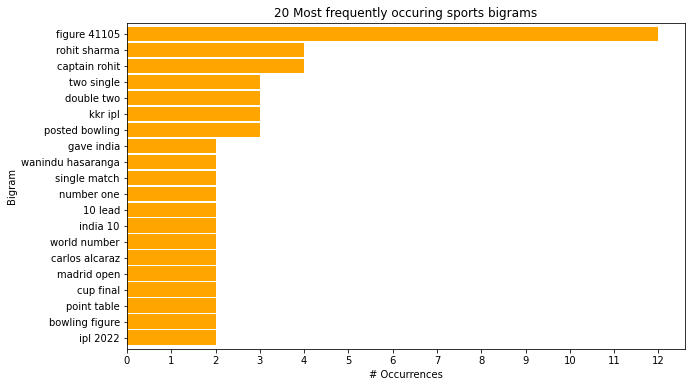

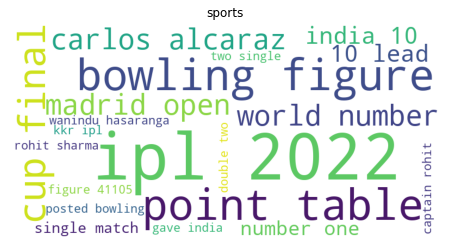

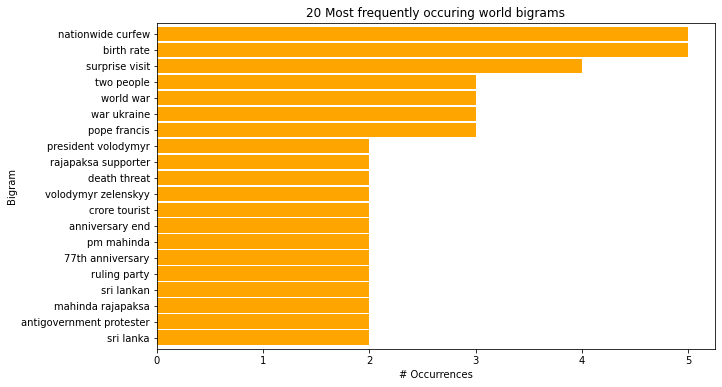

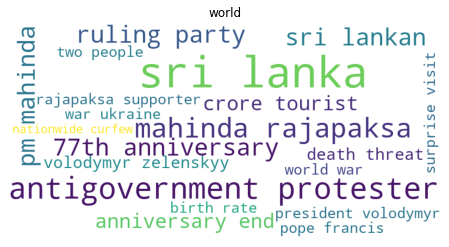

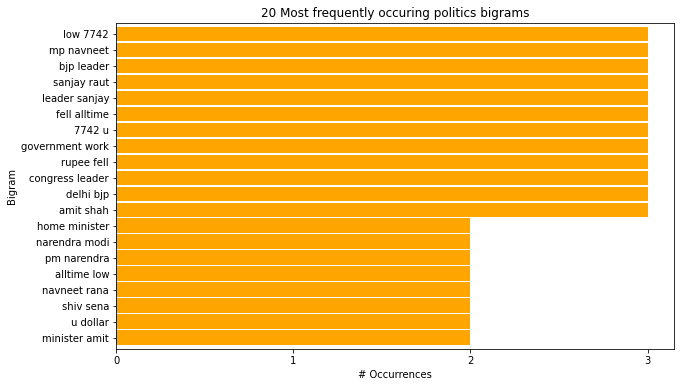

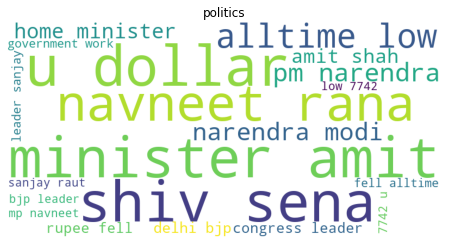

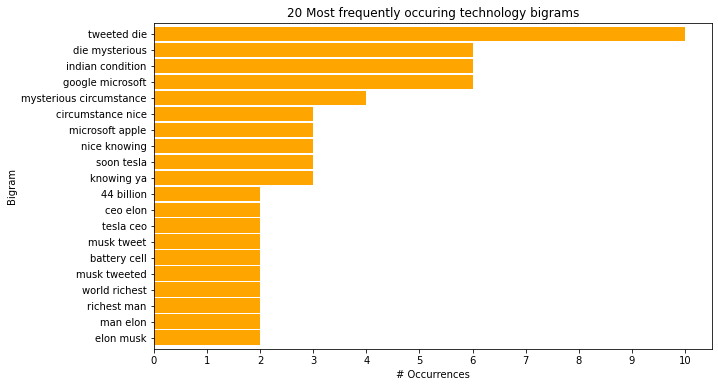

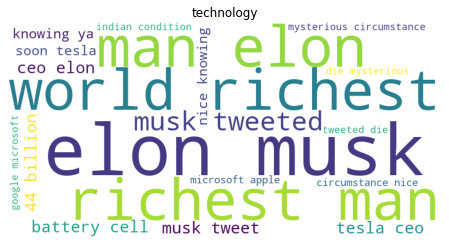

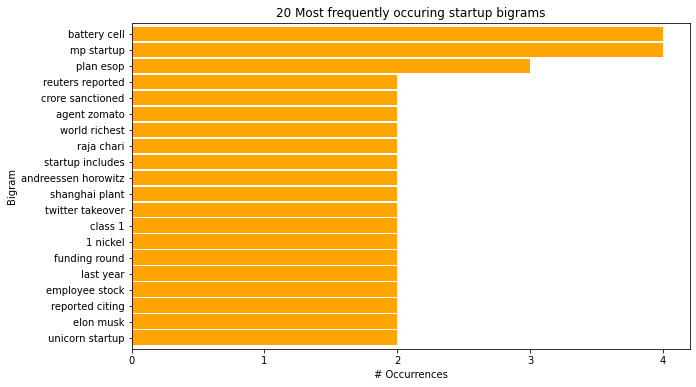

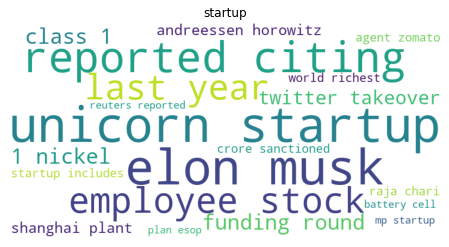

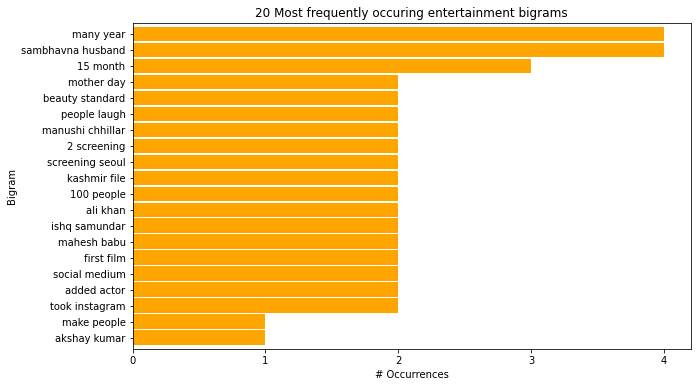

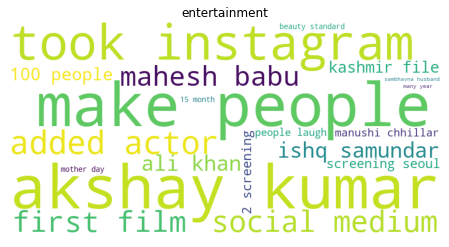

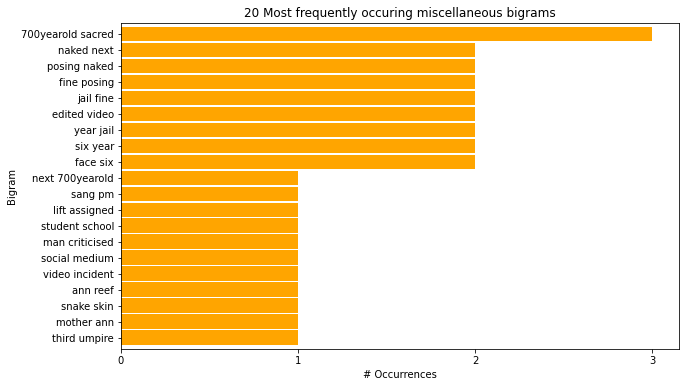

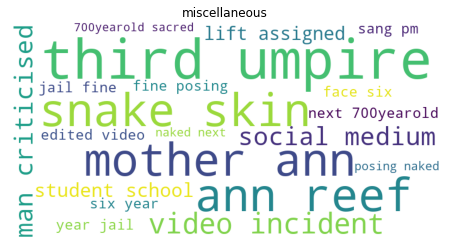

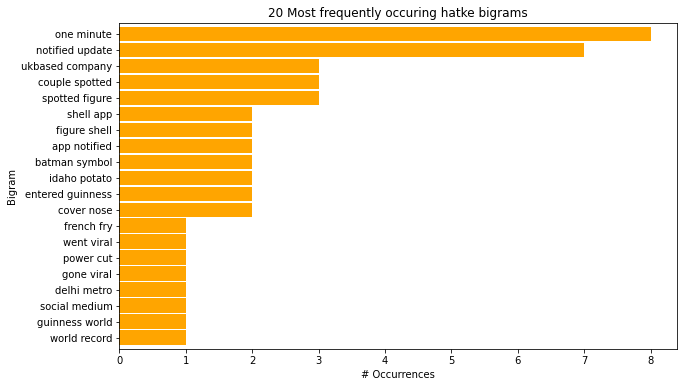

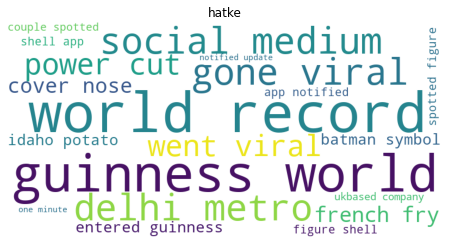

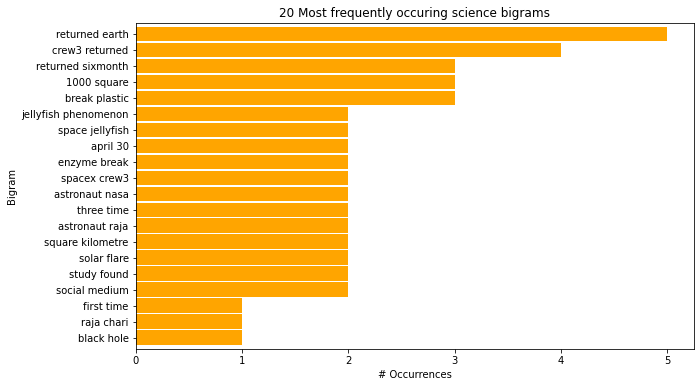

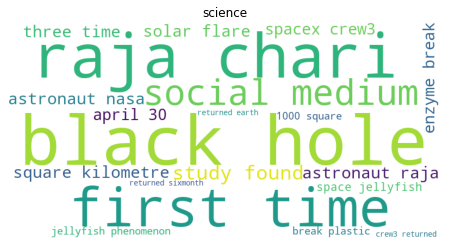

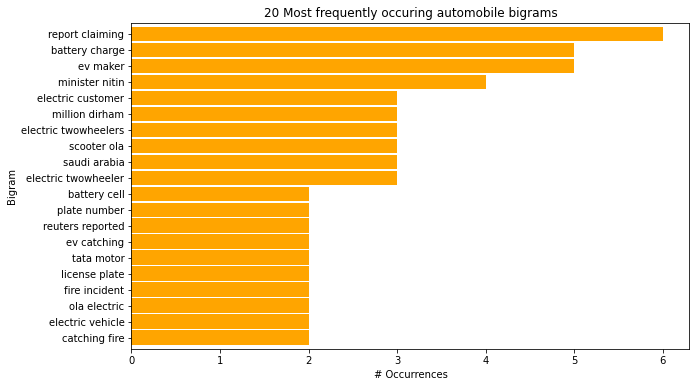

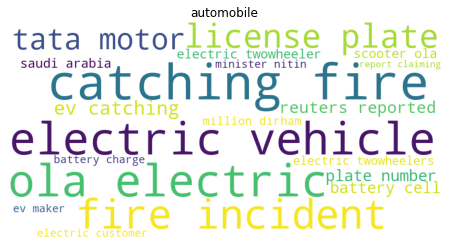

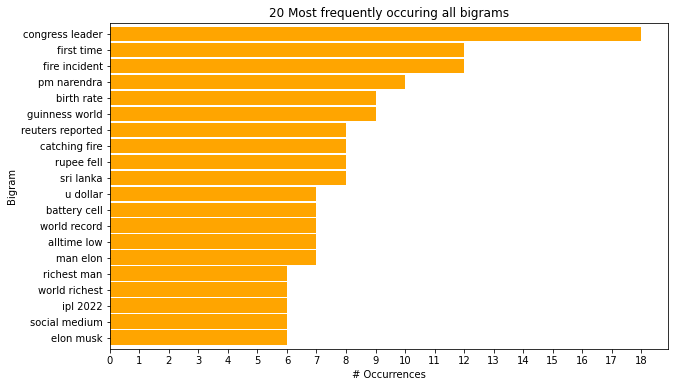

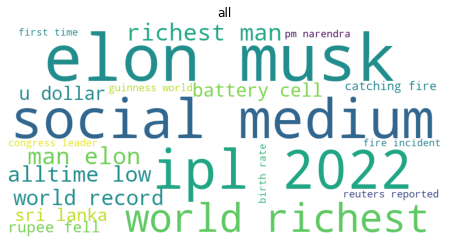

In [46]:
for col in word_counts.columns[:]:
    plot_bigrams(all_words_df, col)
    plt.show()

It's possible to get a better sense of what articles are about in different categories based on the bigrams:
- Politics: political leaders, rupee value, government
- World: war in Ukraine, birth rate, curfews
- Sports: this Rohit person sounds popular
